# Example
This example follows the Section 3.2 Single load-unload cycle example from [1]. It will perofm the fits using the Partial Curve Mapping method, the Area between two curves methods, the Discrete Fréchet Distance, Dynamic Time Warping, and the Curve Length based similarity function.  



# Fit without noise
Essentially we want to find the beta paramters that produce the following curve. We'll use a global optimization algorithim (DE from SciPy [2], [3], [4]) to do so. This is regression of a single load-unload cycle.


### References
[1] Jekel, C. F., Venter, G., Venter, M. P., Stander, N., & Haftka, R. T. (2018). Similarity measures for identifying material parameters from hysteresis loops using inverse analysis. International Journal of Material Forming. https://doi.org/10.1007/s12289-018-1421-8

[2] Storn, R and Price, K, Differential Evolution - a Simple and Efficient Heuristic for Global Optimization over Continuous Spaces, Journal of Global Optimization, 1997, 11, 341 - 359.

[3] http://www1.icsi.berkeley.edu/~storn/code.html

[4] http://en.wikipedia.org/wiki/Differential_evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import similaritymeasures
from scipy.optimize import differential_evolution

x1 = np.linspace(0,1.0,num=100)
xEnd = np.log((1.0 + (2.0*np.exp(1.0)) - np.exp(1.0))/2.0)
x2 = np.linspace(1.0,xEnd, num=50)

y1 = np.exp(x1) - 1.0
y2 = 2*np.exp(x2) - 2.0*np.exp(1.0) + np.exp(1.0) - 1.0
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

exp_data = np.zeros((len(x), 2))
exp_data[:, 0] = x
exp_data[:, 1] = y


plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()


<Figure size 640x480 with 1 Axes>

# Define a numerical model
We can define a function that will act as out numerical model. This function will return the x, y values for a certain set of Beta paramters.

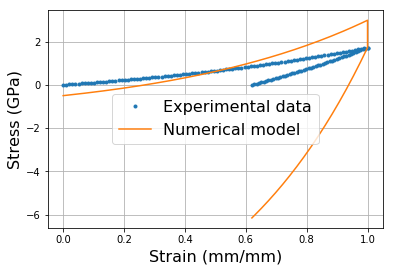

In [2]:
def getXY(betas):
    x1 = np.linspace(0,1.0,num=100)
    xEnd = np.log((1.0 + (2.0*np.exp(1.0)) - np.exp(1.0))/2.0)
    x2 = np.linspace(1.0,xEnd, num=50)

    y1 = np.exp(betas[0]*x1) + betas[1]
    y2 = 2.0*np.exp(betas[2]*x2) -2.0*np.exp(betas[3]) + np.exp(1.0) -1.0
    x = np.concatenate((x1,x2))
    y = np.concatenate((y1,y2))
    return x, y

beta = [1.5, -1.5, 2.0, 2.0]
x, y = getXY(beta)

# plot the results
plt.figure()
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit using the PCM method

     fun: 1.1257238158334842e-14
 message: 'Optimization terminated successfully.'
    nfev: 33465
     nit: 555
 success: True
       x: array([ 1., -1.,  1.,  1.])


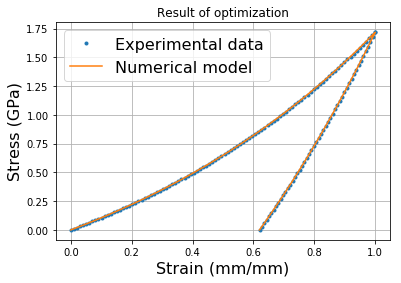

In [3]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using PCM method
    return similaritymeasures.pcm(exp_data, num_data)

# set up bounds for the optimization problem
bounds = np.ones((4, 2))*1.5
bounds[0, 0] = 0.5
bounds[1, 0] = -1.5
bounds[1, 1] = 0.0
bounds[2, 0] = 0.5
bounds[3, 0] = 0.5

# USE DE from scipy to do the optimization

res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Area between curves measure

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using Area method
    return similaritymeasures.area_between_two_curves(exp_data, num_data)

res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Discrete Fréchet distance

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using Frechet method
    return similaritymeasures.frechet_dist(exp_data, num_data)

res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Dynamic Time Warping distance

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using DTW
    return similaritymeasures.dtw(exp_data, num_data)

res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Curve Length based similarity function

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y    
    # evaluate the difference between exp_data and num_data using curve length method
    return similaritymeasures.curve_length_measure(exp_data, num_data)


res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with noise
Let's take the same problem, and add artificial noise to the data. Essentially we want to find the beta paramters that produce the following curve. We'll use a global optimization algorithim to do so. This is regression of a single load-unload cycle.

In [ ]:
#   add noise to the data
noise = np.random.normal(0.0, 0.05, size=150)
exp_data[:, 1] = noise + exp_data[:, 1]

# Fit using the PCM method

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using PCM method
    return similaritymeasures.pcm(exp_data, num_data)


res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Area between curves measure

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using Area method
    return similaritymeasures.area_between_two_curves(exp_data, num_data)


res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Discrete Fréchet distance

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using Frechet method
    return similaritymeasures.frechet_dist(exp_data, num_data)


res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Dynamic Time Warping distance

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using DTW
    return similaritymeasures.dtw(exp_data, num_data)


res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Fit with Curve Length based similarity function

In [ ]:
# define an objective function to minimize
def my_fun(betas):
    x, y = getXY(betas)
    num_data = np.zeros((len(x), 2))
    num_data[:, 0] = x
    num_data[:, 1] = y
    # evaluate the difference between exp_data and num_data using curve length method
    return similaritymeasures.curve_length_measure(exp_data, num_data)


res = differential_evolution(my_fun, bounds=bounds, tol=0.001)

print(res)

# Compute the resulting x y curve
x, y = getXY(res.x)

# plot the results
plt.figure()
plt.title('Result of optimization')
plt.plot(exp_data[:, 0], exp_data[:, 1], '.', label='Experimental data')
plt.plot(x, y, '-', label='Numerical model')
plt.grid(True)
plt.xlabel('Strain (mm/mm)', fontsize=16)
plt.ylabel('Stress (GPa)', fontsize=16)
plt.legend(fontsize=16)
plt.show()